# Example notebook for using teleparallel modified gravity class-code (class_tmg)

In [1]:
from classy import Class
import matplotlib.pylab as plt
from matplotlib import rc
import numpy as np

In [2]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
rc("font", weight="bold"); rc("font", size="20")
rc("axes"); rc("axes",labelsize="18"); rc("xtick",labelsize="18"); rc("ytick",labelsize="18")#, labelweight="bold"
#plt.rcParams['text.usetex']=True
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
font = {'family': 'monospace',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        'style':'italic',
        }

In [3]:
#savedir = '/home/mhashim/lustre_lrg/mhashim/WElHanafyProj_N5/Analysis/PrePlots/'

## 1: LCDM  (retain fiducial LCDM case) 

In [4]:
#LCDM:
model_lcdm = Class()
param_dict_lcdm =  {
    'Omega_fld':0,
    'Omega_scf':0,
    'Omega_T':0,
    'b':0,
    'lensing': 'yes',
    'output':'tCl,pCl,lCl,mPk,mTk', 
    'lensing':'yes',
    'P_k_max_1/Mpc':3.0,
    'l_switch_limber':9,
    'z_max_pk':1e3,
    'gauge':'newtonian',
    'temperature_contributions': 'tsw, eisw,  dop, pol, lisw'
    }
model_lcdm.set(param_dict_lcdm)
model_lcdm.compute()
bg_rslt_dict_lcdm= model_lcdm.get_background()
prt_rslt_dict_lcdm = model_lcdm.get_sources()

In [5]:
bg_rslt_dict_lcdm.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'Omega_r(z)', 'Omega_m(z)', 'gr.fac. D', 'gr.fac. f'])

## 2: fTCDM  

In [6]:
# fT: main branch
model_fT = Class()
param_dict = {
    'Omega_Lambda':0,
    'Omega_fld':0,
    'Omega_scf':0,
    'Omega_T':-1,
    'b':0.3,
    'alpha':0.0,
    'root_method':'fixedpoint',
    'lmbrtbrnch':0, #labmert branch
    'lensing': 'yes',
    'output':'tCl,pCl,lCl,mPk,mTk', 
    'lensing':'yes',
    'P_k_max_1/Mpc':3.0,
    'l_switch_limber':9,
    'z_max_pk':1e3,
    'gauge':'newtonian',
    'temperature_contributions': 'tsw, eisw,  dop, pol, lisw'
    }
model_fT.set(param_dict)
model_fT.compute()
bg_rslt_dict = model_fT.get_background()
prt_rslt_dict = model_fT.get_sources()

In [7]:
bg_rslt_dict.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_T', '(.)w_T', '(.)df_T', '(.)df_TT', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'Omega_r(z)', 'Omega_m(z)', 'gr.fac. D', 'gr.fac. f'])

## Plotting: Background

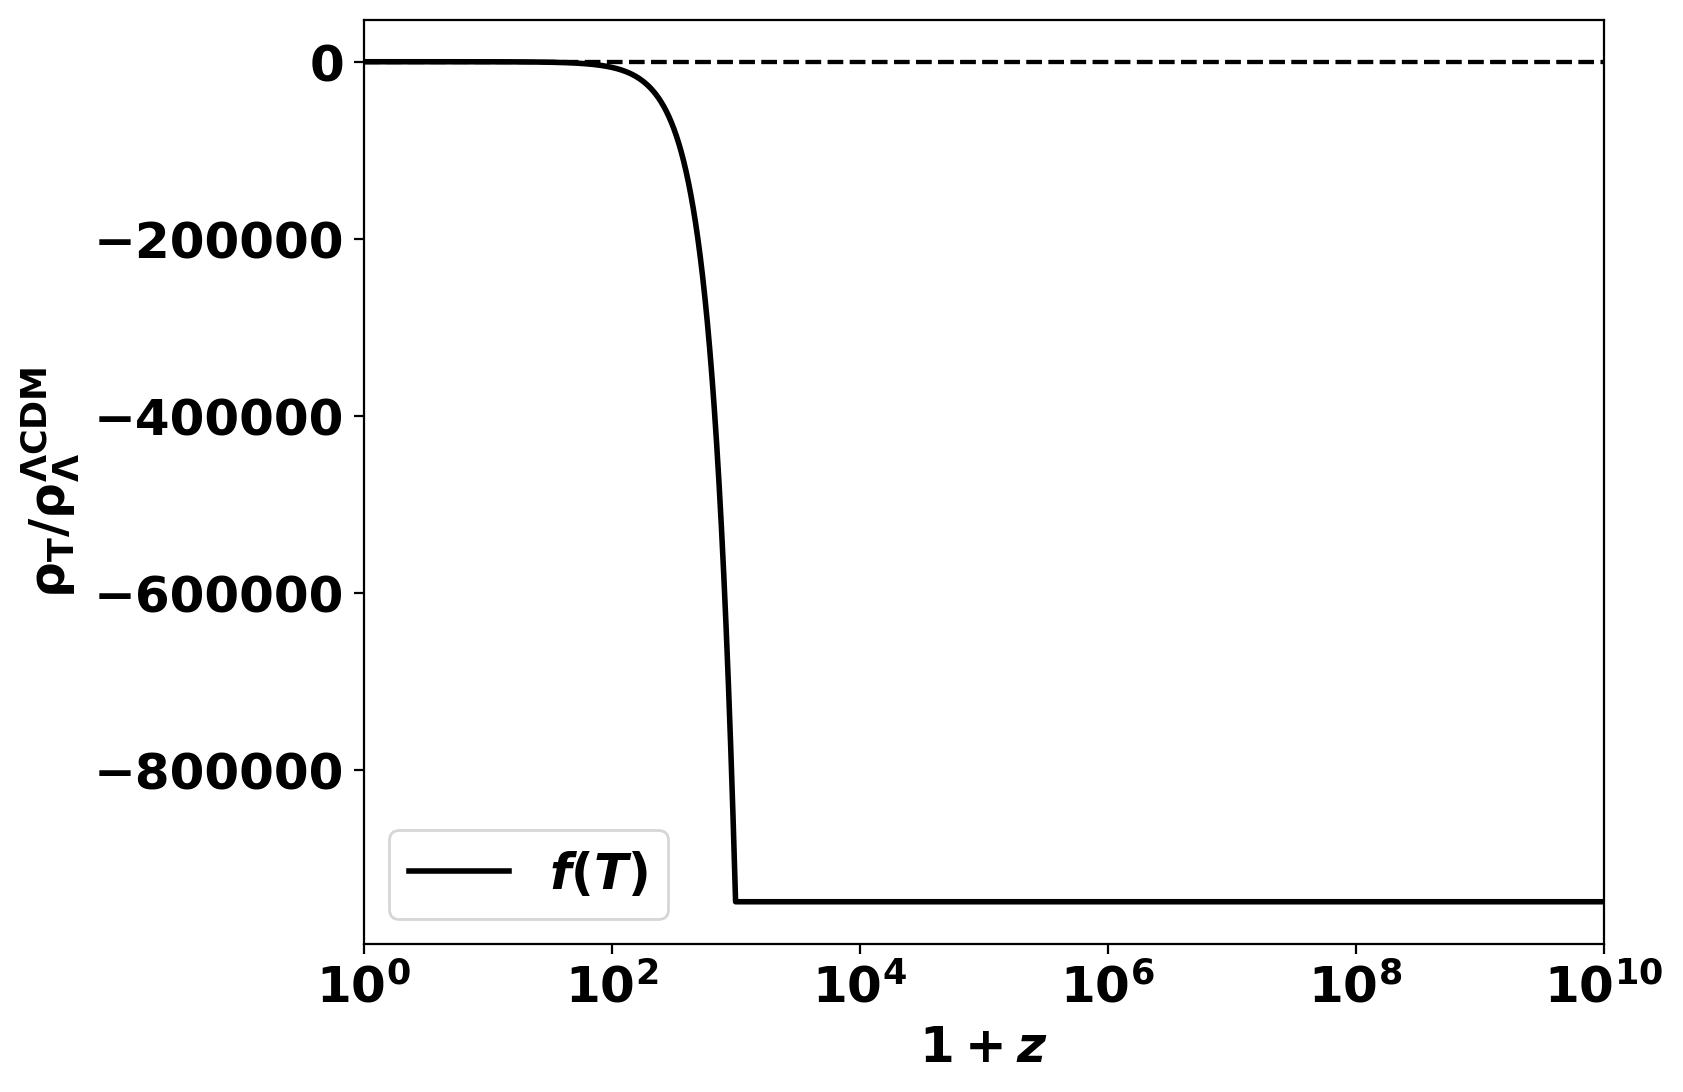

In [8]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.semilogx(1 + bg_rslt_dict['z'], bg_rslt_dict['(.)rho_T']/bg_rslt_dict_lcdm['(.)rho_lambda'], lw=2., ls ='-', c='k', label = r'$f(T)$')
# idx = bg_rslt_dict['(.)rho_T'] <= 0.0
# print(bg_rslt_dict['z'][idx][-1])
#plt.axvline(1 + bg_rslt_dict['z'][idx][-1], lw=1.5, ls='--', c='b')
plt.legend(ncols=1, fontsize=18)
plt.axhline(1.0, lw=1.5, ls='--', c='k')
plt.axhline(0.0, lw=1.5, ls='--', c='k')
plt.xlim(1, 1e10)
#plt.ylim(-8e0, 2e0)
plt.xlabel(r'$1+z$', fontsize=18)
plt.ylabel(r'$\rm \rho_T/\rho_{\Lambda}^{\Lambda CDM}$', fontsize=18)
#plt.savefig(savedir + 'Hubble_vs_z_fT_R_1.png', bbox_inches='tight')
plt.show()

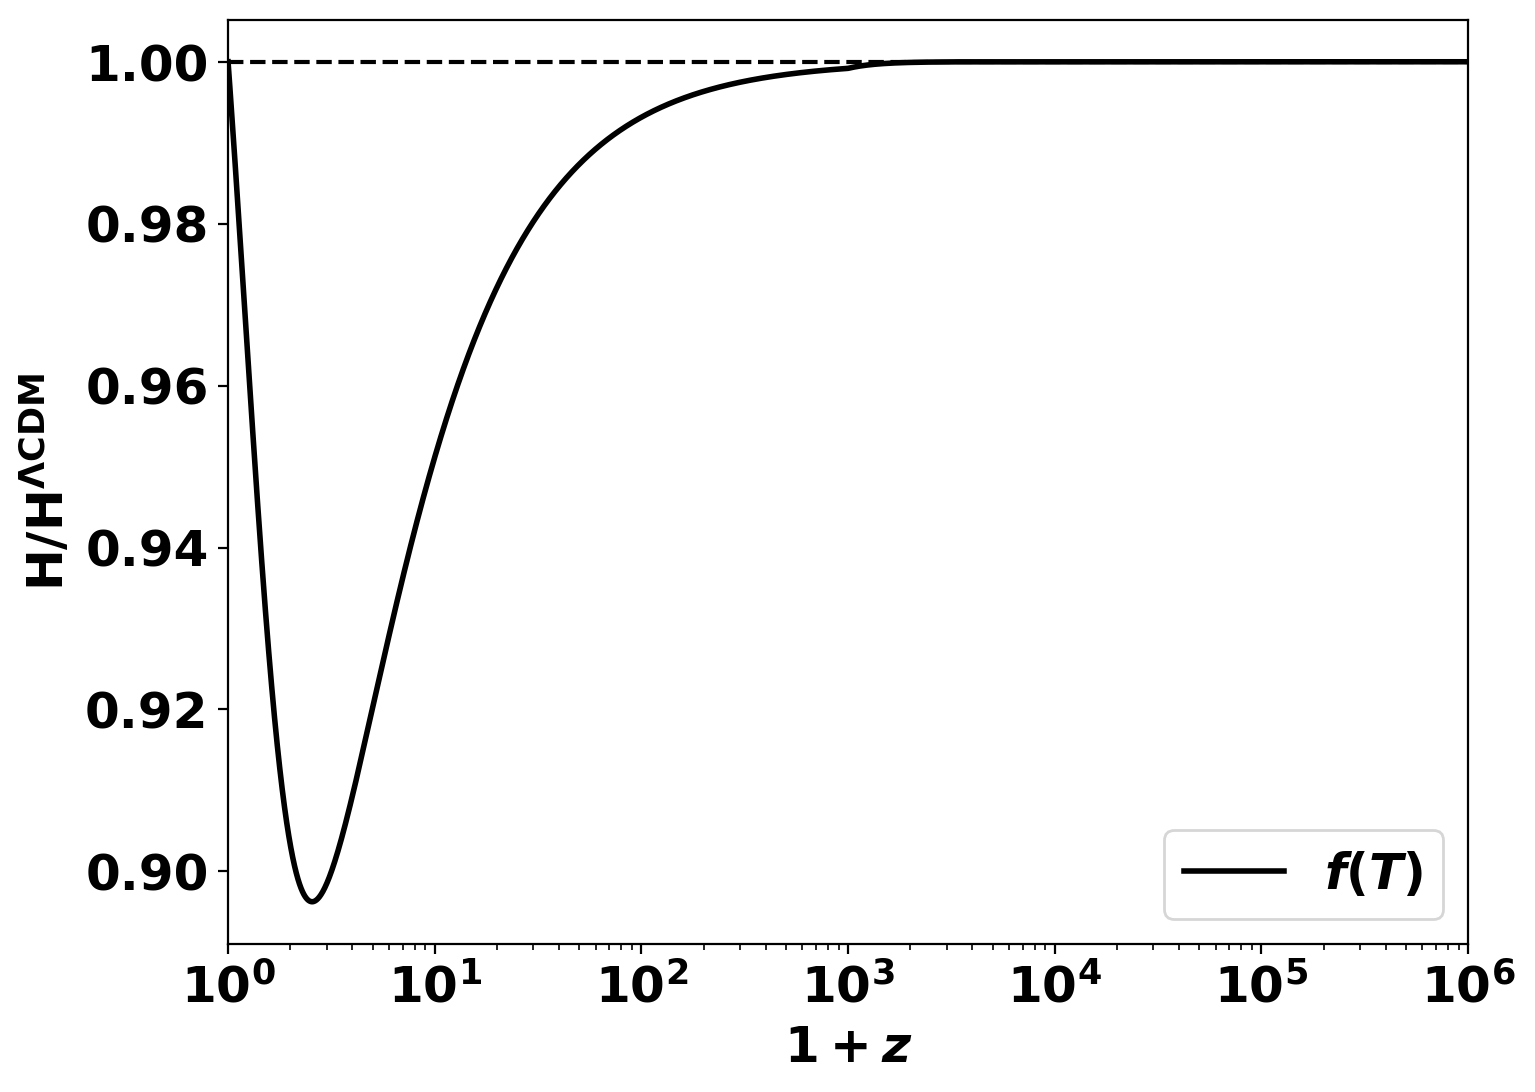

In [11]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.semilogx(1+bg_rslt_dict['z'], bg_rslt_dict['H [1/Mpc]']/bg_rslt_dict_lcdm['H [1/Mpc]'], lw=2., ls ='-', c='k', label = r'$f(T)$')
plt.legend(ncols=1, fontsize=18)
plt.axhline(1.0, lw=1.5, ls='--', c='k')
plt.xlim(1, 1e6)
#plt.ylim(0.999995, 1.0001)
plt.xlabel(r'$1+z$', fontsize=18)
plt.ylabel(r'$\rm H/H^{\Lambda CDM}$', fontsize=18)
#plt.savefig(savedir + 'Hubble_vs_z_fT_R_1.png', bbox_inches='tight')
plt.show()

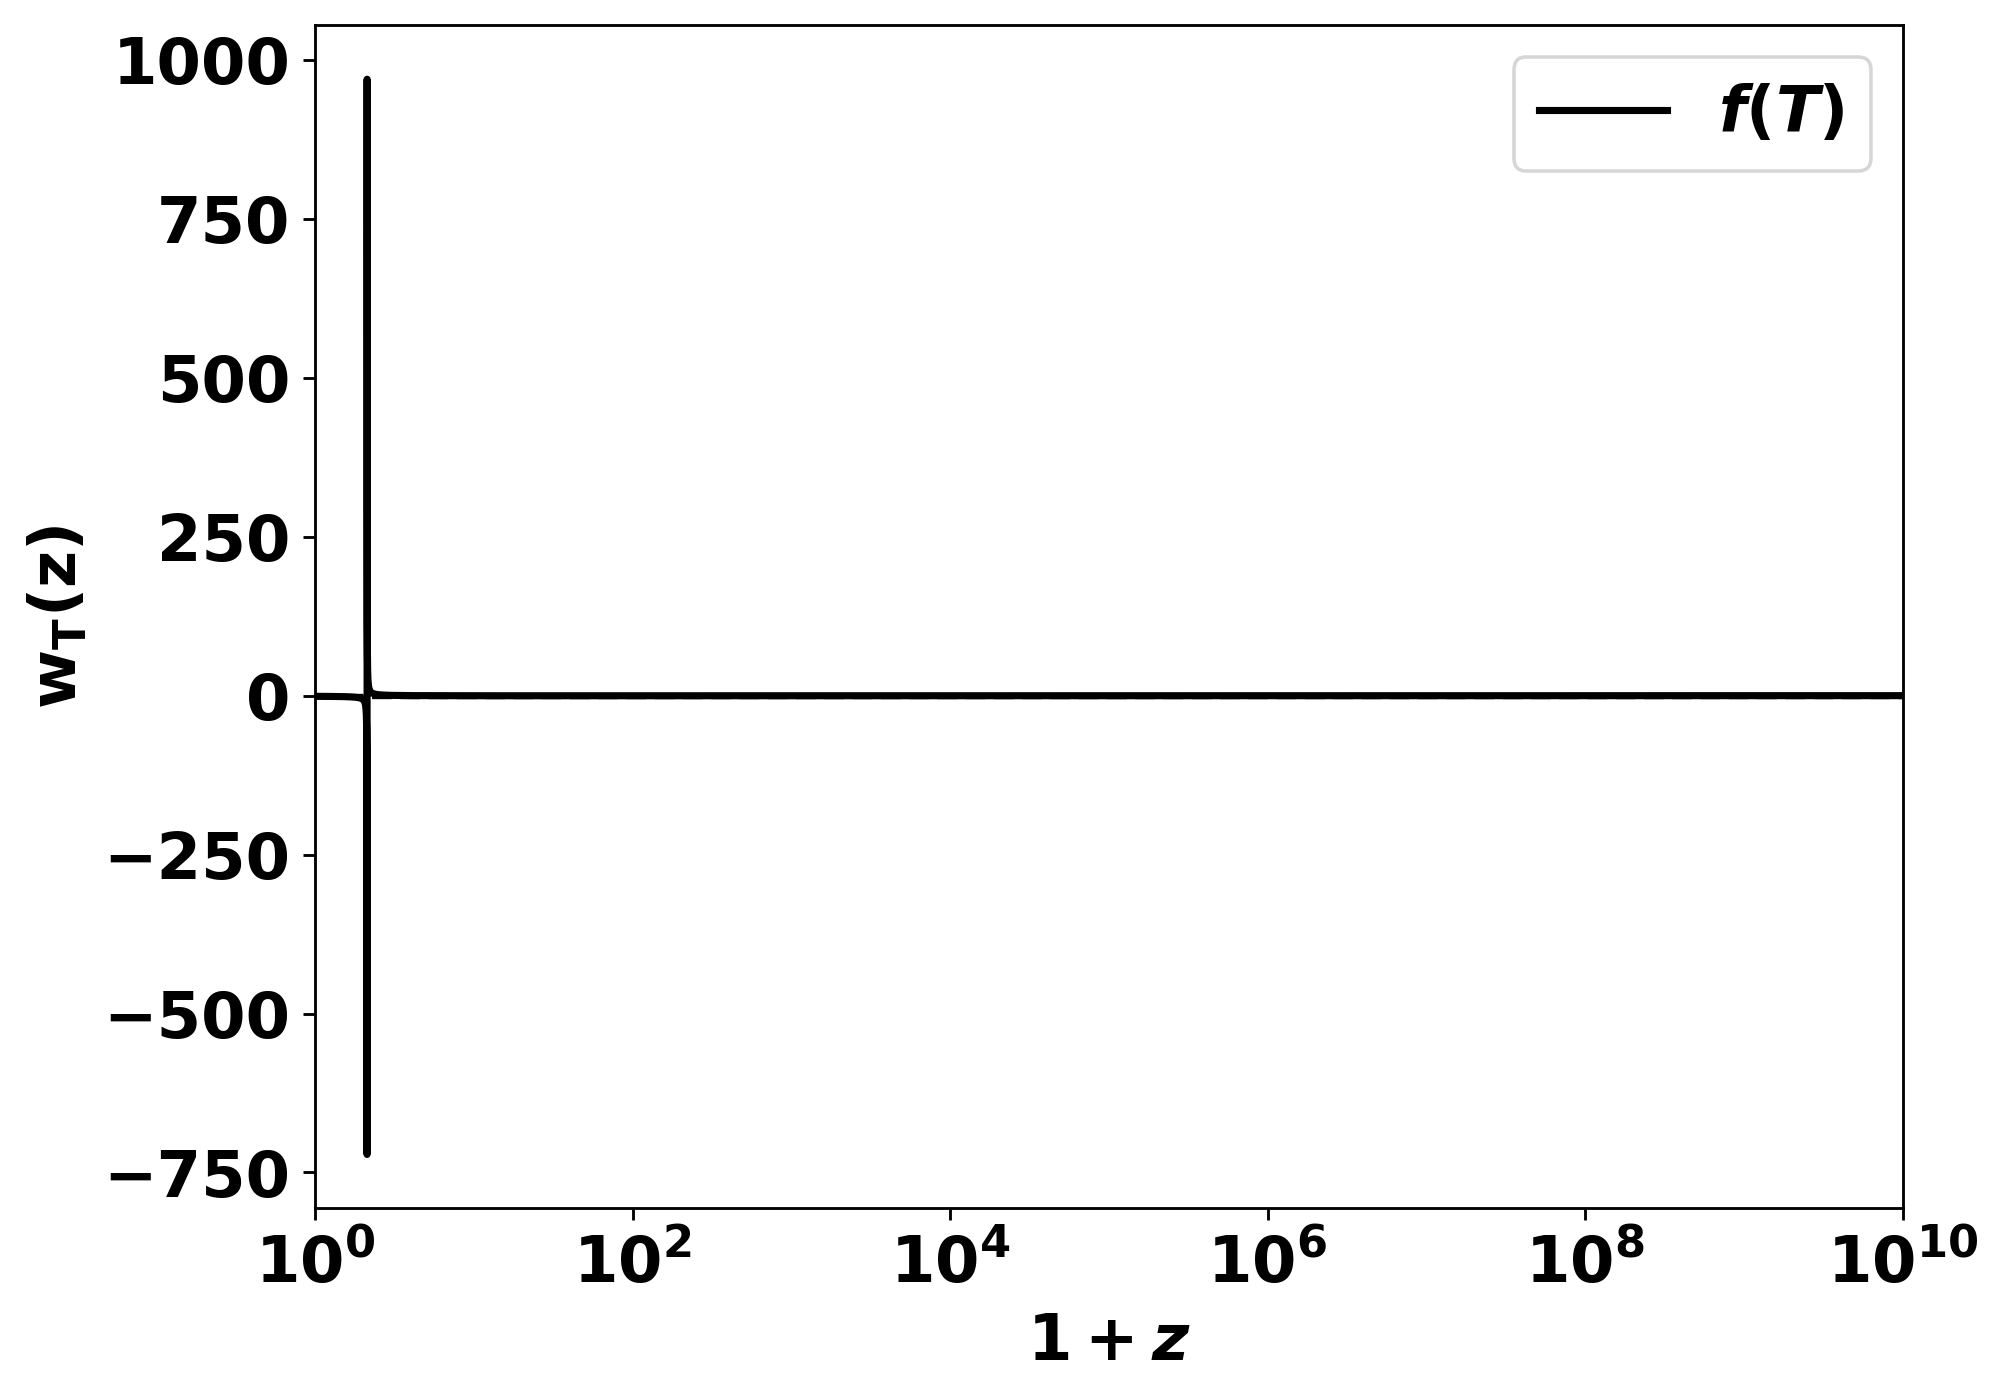

In [12]:
fig, ax = plt.subplots(1,1,figsize = (8, 6),dpi = 128,sharex=True,)
plt.subplots_adjust(wspace=0.0, hspace=0.0)
ax.plot(1+bg_rslt_dict['z'], bg_rslt_dict['(.)w_T'], lw=2., ls ='-', c='k', label = r'$f(T)$')
ax.axhline(-1, ls='--', lw=1.5, c='k')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend(fontsize=18)
ax.set_xlim(1, 1e10)
plt.xlabel(r'$1+z$', fontsize=18)
plt.ylabel(r'$\rm w_T(z)$', fontsize=18)
#plt.savefig(savedir + 'EoS_vs_z_v1.png', bbox_inches='tight')
plt.show()

In [ ]:
fig, (ax,ax2) = plt.subplots(2,1,figsize = (8, 6),dpi = 128,sharex=True, gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(wspace=0.0, hspace=0.0)
spectrum_start = 2
spectrum_end = -1
ell = model_fT.lensed_cl()['ell'][spectrum_start:spectrum_end]
factor = ell*(ell+1)/(2*np.pi)
ax.semilogx(ell, factor*model_fT.lensed_cl()['tt'][spectrum_start:spectrum_end]*(2.7255*1e6)**2, lw=1.5, c='k', ls='-', label=r'$f(T)$')
ax2.semilogx(ell, (model_fT.lensed_cl()['tt'][spectrum_start:spectrum_end]/model_lcdm.lensed_cl()['tt'][spectrum_start:spectrum_end]), ls = '-', lw=1.5, c='k')

ax.semilogx(ell, factor*model_lcdm.lensed_cl()['tt'][spectrum_start:spectrum_end]*(2.7255*1e6)**2, lw=1.5, label=r"$\Lambda CDM$", ls='--', color = 'k')
ax.set_ylabel(r"$\frac{\ell(\ell+1)}{2\pi}C^{TT}_{\ell} [\mu K^2]$")
#ax2.semilogx(ell, (model.raw_cl()['tt'][spectrum_start:spectrum_end]/model_lcdm.raw_cl()['tt'][spectrum_start:spectrum_end]), ls = '--', lw=0.7, color = 'k')
ax2.axhline(y=1, color='k',ls='-.',lw=1.5)
ax.set_ylim(0, 6e3)
ax2.set_ylim(0.5, 2.5)

# ax.errorbar(Planck18_ell, Planck18_TT_data, yerr=Planck18_TT_err_combined, markersize = '3', capsize = 1, elinewidth = 1, ls='none', color = 'k')

ax2.set_ylabel(r"$C^{TT}_{\ell}/C^{TT}_{\ell, \Lambda CDM}$")
plt.xlabel(r'$\ell$')
ax.legend(ncol=1, fontsize=18)
#plt.savefig(savedir + 'Cl_vs_l_fT_new.png', bbox_inches='tight')
plt.show()